<a href="https://colab.research.google.com/github/MicahMeadows/CSC-781-GoogleColab/blob/main/knn_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### KNN Algoirthm Report
The KNN algorithm is a simple way to classify or predict something based on what similar things are. It looks at the closest neighbors (previous examples or data) and makes a decision based on what the majority of them are. This report will explain more about how the KNN algorithm works and how it can be used.

#### Import Load Digits
The SK learn dataset contains 1797 individually drawn images of digits. 

These digits are represented by 8x8 bitmap images of hand drawn digits.

By calling the ```load_digits()``` method in the ```sklearn.datasets``` we can access these samples. In order to access the samples we can access the ```.data[i]``` attribute and to get the associated label we can access the ```.target[i]``` attribute

In [1]:
from sklearn.datasets import load_digits

digits_data = load_digits()

samples = digits_data.data
labels = digits_data.target

print(samples[:2])
print(labels[:2])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
[0 1]


#### Import Numpy

Numpy library contains many helpful mathematical operations that we can use to organize, split, randomize, and normalize our data variables. We import the package here to use these methods.

In [2]:
import numpy as np

#### Combine sample data and label
During shuffling we need to be able to match the label to the initial data so the labels need shuffled along side the feature data

In [3]:
labels = np.expand_dims(labels, 1)
fixed_samples = np.append(samples, labels, 1)

#### Shuffle The Data

The data is shuffled as it is by default not random. By shuffling it we have a better chance at having random data in the test, dev, and training data sets.

In [4]:
np.random.shuffle(fixed_samples)

#### Extract origional samples and labels from shuffled data

After we have shuffled the data, we convert it back to their origional forms retaining the index so we can match the labels to the feature data as needed.

In [5]:
def split_fixed_samples(fixed_samples):
  feature_objects = fixed_samples[: , :-1]
  label_objects = fixed_samples[: , -1]
  return feature_objects, label_objects

In [6]:
num_samples_total = len(fixed_samples)

top_train_idx = int(num_samples_total * .70)
top_dev_idx = int(num_samples_total * .85)

train_samples, train_labels = split_fixed_samples(fixed_samples[:top_train_idx])
dev_samples, dev_labels = split_fixed_samples(fixed_samples[top_train_idx:top_dev_idx])
test_samples, test_labels = split_fixed_samples(fixed_samples[top_dev_idx:])

#### Euclidean distance

Euclidean distance allows us to detect the distance between n-dimentional data samples.

In [7]:
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i]) ** 2
  return np.sqrt(distance)

#### Select K Neighbors
This method will select our closest k neighbors which is the core idea behind K nearest neighbors. ```samples``` contains our trained samples to search through, ```labels``` contains the labels for the samples, ```test_row``` is the new sample were comparing to the trained samples, and ```num_neighbors``` is our 'k' value for KNN.

In [8]:
def get_neighbors(samples: list, labels, test_row, num_neighbors):
  neighbors = []

  # get distances of all samples
  for i in range(len(samples)):
    row = samples[i]
    label = labels[i]
    dist = euclidean_distance(row, test_row)
    neighbors.append((row, label, dist))
  
  # sort closest neighbors
  neighbors.sort(key=lambda i: i[2])

  # get closest 'num_neighbors'
  output_neighbors = []
  output_labels = []
  output_distances = []

  k_neighbors = neighbors[:num_neighbors]

  for neighbor in k_neighbors:
    output_neighbors.append(neighbor[0])
    output_labels.append(neighbor[1])
    output_distances.append(neighbor[2])

  return output_neighbors, output_labels, output_distances

#### Make Prediction

our prediction takes in our new sample to check and returns what the Machine Learning Algorithm believes the data will be.

In [9]:
def prediction_classification(test_samples, test_labels, test_sample, num_neighbors):
  close_samples, close_labels, close_distances = get_neighbors(test_samples, test_labels, test_sample, num_neighbors)
  label_cnt = np.bincount(close_labels)
  prediction = np.argmax(label_cnt)
  return prediction

In [10]:
k = 4
pred_labels = []
for i in range(len(dev_samples)):
  result = prediction_classification(train_samples, train_labels, dev_samples[i], k)
  pred_labels.append(result)

You can see here we were able to achieve a high accuracy with the algorithm when settings k = 4. The result was 97% accuracy

In [11]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(dev_labels, pred_labels)
print(acc)

0.9777777777777777


#### Test All K Values

We can use this in order to determine the most optimal K value for our eventual model.

In [12]:
k_list = list(range(1, 5, 5))
performance = []
for k in k_list:
  pred_labels = []
  for i in range(len(dev_samples)):
    result = prediction_classification(train_samples, train_labels, dev_samples[i], k)
    pred_labels.append(result)
  accuracy = accuracy_score(dev_labels, pred_labels)
  performance.append(accuracy)

#### Plot our best K values
by plotting our K values we can see how the algorithm performs based on the K values and we can select our best K value to use.

Text(0.5, 1.0, 'Performance')

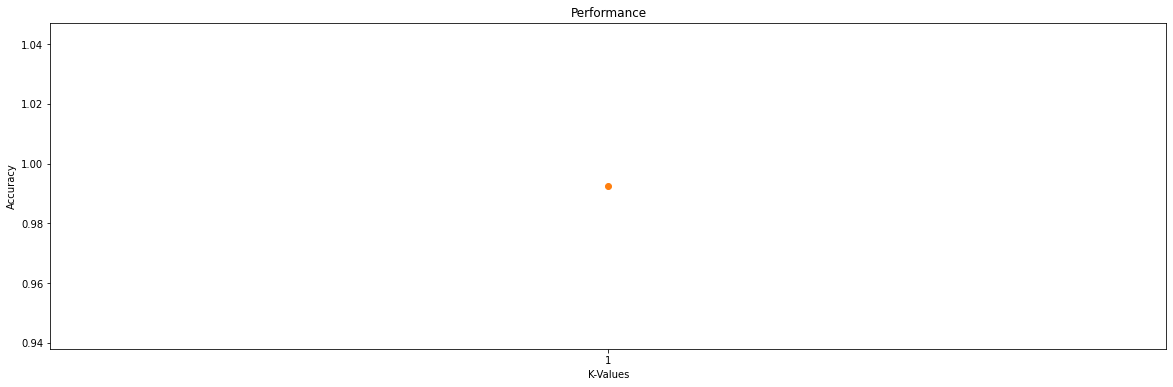

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'o')
plt.xticks(k_list)
plt.xlabel("K-Values")
plt.ylabel("Accuracy")
plt.title("Performance")

In [14]:
k = 7
pred_labels = []
for sample in test_samples:
  pred = prediction_classification(train_samples, train_labels, sample, k)
  pred_labels.append(pred)
accuracy = accuracy_score(test_labels, pred_labels)
print(accuracy)

0.9814814814814815


#### Visualized Results
Below is a truth table with 10 randomly selected results tested and compared to their actual values.

In [19]:
k = 4
print('TRUTH TABLE:')
print('------------')
for i in range(10):
  pred = prediction_classification(train_samples, train_labels, test_samples[i], k)
  real = int(test_labels[i])
  print(f'{pred} | {real} -> {True if pred == real else False}')


TRUTH TABLE:
------------
8 | 8 -> True
3 | 3 -> True
5 | 5 -> True
2 | 2 -> True
9 | 9 -> True
7 | 7 -> True
8 | 8 -> True
3 | 3 -> True
1 | 1 -> True
3 | 3 -> True
